In [1]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
from side_extractor import process_piece, plot_side_images
from functools import partial
import traceback

In [13]:
directory = 'test_images'

filenames = os.listdir(directory)
filenames.sort()

if ".DS_Store" in filenames:
    filenames.remove(".DS_Store")

SyntaxError: invalid syntax (<ipython-input-13-011a219074e2>, line 7)

In [14]:
def plot_grid(size, out_dict, *image_keys):
    h, w = size
    for idx, img_key in enumerate(image_keys, start=1):
        plt.subplot(h * 100 + w * 10 + idx)
        if img_key[0] == '_':
            plt.imshow(out_dict[img_key[1:]], cmap='gray')
        else:
            plt.imshow(out_dict[img_key])

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


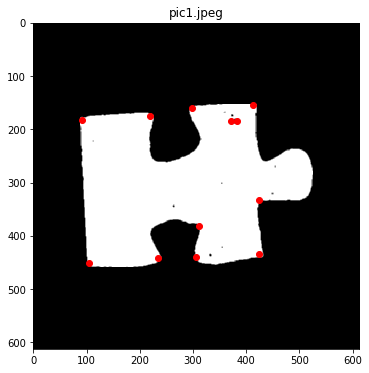

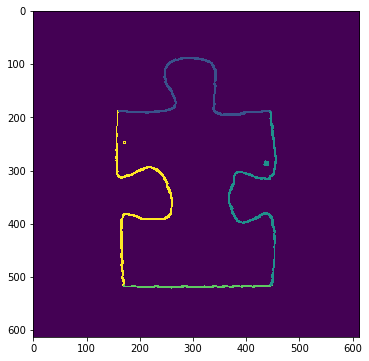

In [15]:
postprocess = partial(cv2.blur, ksize=(3, 3))
results = []
error_labels = []

for filename in filenames:
    img = cv2.imread(join(directory, filename))
    
    out_dict = process_piece(img, after_segmentation_func=postprocess, scale_factor=0.4, 
                             harris_block_size=5, harris_ksize=5,
                             corner_score_threshold=0.2, corner_minmax_threshold=100)
    
    plt.figure(figsize=(6, 6))
    plt.title(filename)
    plt.imshow(out_dict['extracted'], cmap='gray')
    plt.scatter(out_dict['xy'][:, 0], out_dict['xy'][:, 1], color='red')
    #plt.colorbar()
    plt.show()
    
    if 'error' in out_dict:
        print(filename, ':', out_dict['error'])
        error_labels.append(filename)
        traceback.print_exc()
        continue
        
    else:
        
        plt.figure(figsize=(6, 6))
        # plt.title(filename)
        plt.imshow(out_dict['class_image'])
        #plot_grid((3, 3), out_dict, '_segmented', '_extracted', '_edges', 'class_image')
        # plt.show()

        # plot_side_images(out_dict['side_images'], out_dict['inout'])

        results.append({'side_images': out_dict['side_images'], 'inout': out_dict['inout']})

In [24]:
to_ignore = ['D70']
for el in error_labels:
    labels.remove(el)

for label, result in zip(labels, results):
    
    if label in to_ignore:
        continue
    
    for i, (side_image, io) in enumerate(zip(result['side_images'], result['inout']), start=1):
        
        out_io = 'int' if io == 'in' else 'out'
        side_image = side_image * 255
        
        
        out_filename = "{0}_{1}_{2}.jpg".format(label, i, out_io)
        out_path = join('sides', out_filename)
        
        cv2.imwrite(out_path, side_image)

NameError: name 'labels' is not defined